# Exoplanet Hunting - Search New Earths

An `Exoplanet` or `Extrasolar planet` is a planet outside the Solar System. The first possible evidence of an exoplanet was noted in 1917, but was not recognized as such. The first confirmation of detection occurred in 1992. This was followed by the confirmation of a different planet, originally detected in 1988. As of 1 October 2020, there are 4,354 confirmed exoplanets in 3,218 systems, with 712 systems having more than one planet.

Some Exoplanets Are: `Kepler-186f`, `Kepler-11`, `Osrisis`, `CoRoT 7b`

For more about Exoplanets: 
- https://en.wikipedia.org/wiki/Exoplanet
- https://exoplanets.nasa.gov/

## Import Basic Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## Import Datasets

In [2]:
train = pd.read_csv('../Datasets/Exoplanet/exoTrain.csv',)
test = pd.read_csv('../Datasets/Exoplanet/exoTest.csv')

In [3]:
train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
x = train.loc[:,train.columns[1:]]
y = train.loc[:,'LABEL'] - 1
y = np.array(y)

xtest = test.loc[:,test.columns[1:]]
ytest = test.loc[:,'LABEL'] - 1
ytest = np.array(ytest)

x.shape, xtest.shape

((5087, 3197), (570, 3197))

## Distribution of Train Dataset

1    5050
2      37
Name: LABEL, dtype: int64


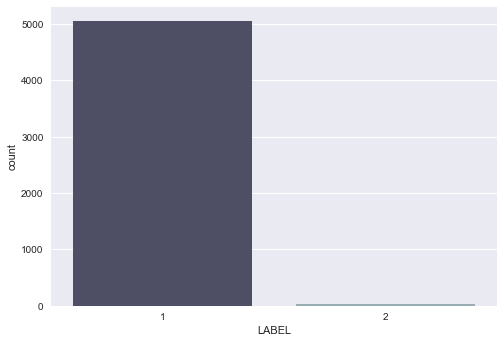

In [5]:
print(train.LABEL.value_counts())

sns.countplot('LABEL', data=train, palette='bone')
plt.show()

- From the above graph we can observe, this dataset is very Unbalanced.
- Feeding this dataset to model can lead skewed towards class `1`.

### Upsampling Dataset

In [6]:
from imblearn.combine import SMOTETomek

In [7]:
smk = SMOTETomek(random_state=42,)
xtrain, ytrain = smk.fit_sample(x,y)

In [8]:
print(xtrain.shape, ytrain.shape)
print(np.unique(ytrain,return_counts=True))

(10100, 3197) (10100,)
(array([0, 1], dtype=int64), array([5050, 5050], dtype=int64))


### Normalize Datasets

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std = StandardScaler()
std.fit(xtrain)

xtrain = std.transform(xtrain)
xtest = std.transform(xtest)

In [11]:
xtrain.shape, xtest.shape

((10100, 3197), (570, 3197))

### Shuffle dataset

In [12]:
import random

In [13]:
train = np.concatenate((xtrain,ytrain.reshape(-1,1)),axis=1)
random.shuffle(train)

xtrain = train[:,:-1]
ytrain = train[:,-1]

In [14]:
xtrain.shape, ytrain.shape

((10100, 3197), (10100,))

## Train Model
### Deep Learning Model - Tensorflow

In [20]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

In [25]:
model = Sequential()

In [26]:
model.add(Conv1D(16, kernel_size=7, activation='relu', input_shape=(3197,1)))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(32, kernel_size=5, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 3191, 16)          128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1595, 16)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1595, 16)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1591, 32)          2592      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 795, 32)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 795, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 793, 64)          

In [27]:
xtrain_tf = xtrain.reshape((-1,3197,1))
xtest_tf = xtest.reshape((-1,3197,1))

In [28]:
hist = model.fit(xtrain_tf,ytrain,batch_size=64,epochs=10,shuffle=True,validation_split=0.1)

Epoch 1/10
143/143 [==============================] - 119s 834ms/step - loss: 0.4686 - accuracy: 0.8526 - val_loss: 0.8785 - val_accuracy: 0.5386
Epoch 2/10
143/143 [==============================] - 127s 887ms/step - loss: 0.4112 - accuracy: 0.8558 - val_loss: 0.8681 - val_accuracy: 0.5386
Epoch 3/10
143/143 [==============================] - 136s 949ms/step - loss: 0.4046 - accuracy: 0.8558 - val_loss: 0.9157 - val_accuracy: 0.5386
Epoch 4/10
143/143 [==============================] - 130s 910ms/step - loss: 0.3897 - accuracy: 0.8558 - val_loss: 0.8136 - val_accuracy: 0.5386
Epoch 5/10
143/143 [==============================] - 130s 907ms/step - loss: 0.3714 - accuracy: 0.8558 - val_loss: 0.8257 - val_accuracy: 0.5386
Epoch 6/10
143/143 [==============================] - 132s 922ms/step - loss: 0.3578 - accuracy: 0.8558 - val_loss: 0.7402 - val_accuracy: 0.5386
Epoch 7/10
143/143 [==============================] - 161s 1s/step - loss: 0.3337 - accuracy: 0.8647 - val_loss: 0.7701 - va